In [1]:
import pandas as pd

dataset = pd.read_csv('tweets.csv',encoding='ISO-8859-1')

In [2]:
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


Generating word Frequency

In [3]:
def gen_freq(text):
    word_list =[] #will store the list of words
    
    for tw_words in text.split():  # loop over all the tweets and extract words into word_list
        word_list.extend(tw_words)
        
    word_freq =pd.Series(word_list).value_counts()  # create word frequencies using word_list
    
    word_freq[:20]  #print top 20 words 
    
    return word_freq
gen_freq(dataset.text.str)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
https://t.co/3sG3VoAsi8        1
https://t.co/IeYmACmhou        1
airport,heading                1
#askbokil                      1
inc                            1
Length: 19601, dtype: int64

EDA Using Word Cloud

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

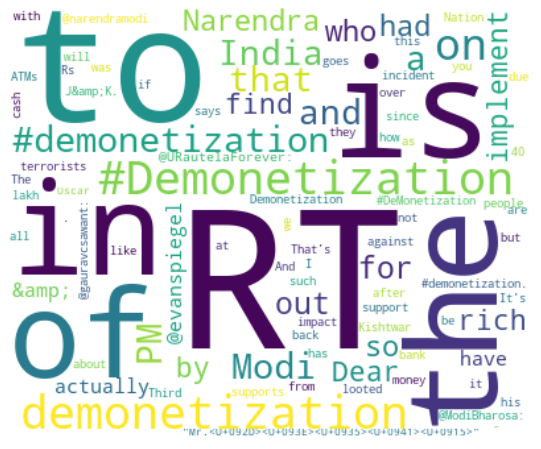

In [5]:
word_freq = gen_freq(dataset.text.str); # generating frequencies

wc = WordCloud(width=400,height=330,max_words=100,background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

TOKENIZATION

In [6]:
# import nltk
# nltk.download('punkt')
  

from nltk.tokenize import sent_tokenize,word_tokenize

text = "hi rachana how are you doing ? I will be travelling to your city. Lets catchup tonight."
sent_tokenize(text)


['hi rachana how are you doing ?',
 'I will be travelling to your city.',
 'Lets catchup tonight.']

In [7]:
word_tokenize(text)

['hi',
 'rachana',
 'how',
 'are',
 'you',
 'doing',
 '?',
 'I',
 'will',
 'be',
 'travelling',
 'to',
 'your',
 'city',
 '.',
 'Lets',
 'catchup',
 'tonight',
 '.']

STEMMING


In [8]:
from nltk.stem import PorterStemmer

st = PorterStemmer()

ex_word = ["playing","played","running"]

for w in ex_word:
   print(st.stem(w))
  

play
play
run


In [9]:
#import nltk
#nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /home/rachana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()
print(lemm.lemmatize("playing",pos='v'))

play


In [14]:
from nltk import pos_tag

text = "hi rachana how are you doing ? I will be travelling to your city. Lets catchup tonight."

tokens = word_tokenize(text)
pos_tag(tokens)

[('hi', 'NN'),
 ('rachana', 'VB'),
 ('how', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('doing', 'VBG'),
 ('?', '.'),
 ('I', 'PRP'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('travelling', 'VBG'),
 ('to', 'TO'),
 ('your', 'PRP$'),
 ('city', 'NN'),
 ('.', '.'),
 ('Lets', 'VBZ'),
 ('catchup', 'JJ'),
 ('tonight', 'NN'),
 ('.', '.')]

In [13]:
#import nltk
#nltk.download('averaged_perceptron_tagger')
  

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rachana/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [17]:
from nltk.corpus import wordnet

wordnet.synsets('computer')

[Synset('computer.n.01'), Synset('calculator.n.01')]

In [21]:
from nltk import ngrams

sentence = "I love to listen songs"

n=2
for gram in ngrams(word_tokenize(sentence), n):
    print(gram)

('I', 'love')
('love', 'to')
('to', 'listen')
('listen', 'songs')
